<a href="https://colab.research.google.com/github/tiakoch/Professional-Projects/blob/main/Chris_Tiako_Crude_Oil_Weekly_Balances_%2B_Multivariable_Regressions_%2B_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import seaborn as sns
!pip install eia-python


In [ ]:
API_KEY = "HXUYr8Zi6Vc5JwWcaJsXUZULiTf2A41rRtHhWTp5"

# --- Crude Oil Prices ---

# API Request Parameters
prices_params = {
    "frequency": "weekly",
    "data": ["value"],
    "facets": {
        "series": ["RBRTE", "RWTC"]
    },
    "start": "2019-01-25",
    "end": None,  # Set to None for the most recent data
    "sort": [{"column": "period", "direction": "desc"}],
    "offset": 0,
    "length": 5000
}


prices_x_params = json.dumps(prices_params)

# Construct the API request URL for Crude Oil Prices
prices_url = f"https://api.eia.gov/v2/petroleum/pri/spt/data/?api_key={API_KEY}"

# Define the headers for Crude Oil Prices
prices_headers = {
    "X-Params": prices_x_params
}

# Send the API request for Crude Oil Prices
prices_response = requests.get(prices_url, headers=prices_headers)


prices_data = prices_response.json()

# Create a pandas DataFrame for Crude Oil Prices
prices_df = pd.DataFrame(prices_data["response"]["data"])


prices_df = prices_df.rename(columns={"period": "Date", "value": "Price"})

# Set 'Date' column as index and convert to datetime
prices_df = prices_df.set_index("Date")
prices_df.index = pd.to_datetime(prices_df.index)

# Make the Dataframe Cleaner
prices_df = prices_df.pivot(columns="series", values="Price")

# Rename columns to WTI Price and Brent Price
prices_df = prices_df.rename(
    columns={
        "RBRTE": "Brent Price",
        "RWTC": "WTI Price",
    }
)

# --- Crude Oil Inventory ---

# Define the API request parameters for Crude Oil Inventory
inventory_params = {
    "frequency": "weekly",
    "data": ["value"],
    "facets": {
        "series": ["WCESTP11", "WCESTP21", "WCESTP31", "WCESTP41", "WCESTP51"]
    },
    "start": "2019-01-25",
    "end": None,  # Set to None for the most recent data
    "sort": [{"column": "period", "direction": "desc"}],
    "offset": 0,
    "length": 5000
}


inventory_x_params = json.dumps(inventory_params)

# Construct the API request URL for Crude Oil Inventory
inventory_url = f"https://api.eia.gov/v2/petroleum/stoc/wstk/data/?api_key={API_KEY}"

# Define the headers for Crude Oil Inventory
inventory_headers = {
    "X-Params": inventory_x_params
}

# Send the API request for Crude Oil Inventory
inventory_response = requests.get(inventory_url, headers=inventory_headers)


inventory_data = inventory_response.json()

# Create a pandas DataFrame for Crude Oil Inventory
inventory_df = pd.DataFrame(inventory_data["response"]["data"])


inventory_df = inventory_df.rename(columns={"period": "Date", "value": "Value"})


inventory_df = inventory_df.set_index("Date")
inventory_df.index = pd.to_datetime(inventory_df.index)

# Pivot the DataFrame to have PADDs as columns
inventory_df = inventory_df.pivot(columns="series", values="Value")

# Rename columns to PADD1 Total Inventory, PADD2 Total Inventory, etc.
inventory_df = inventory_df.rename(
    columns={
        "WCESTP11": "PADD1 Total Inventory",
        "WCESTP21": "PADD2 Total Inventory",
        "WCESTP31": "PADD3 Total Inventory",
        "WCESTP41": "PADD4 Total Inventory",
        "WCESTP51": "PADD5 Total Inventory",
    }
)

# --- PADD Imports ---

# Define the API request parameters for PADD Imports
imports_params = {
    "frequency": "weekly",
    "data": ["value"],
    "facets": {
        "series": ["WCEIMP12", "WCEIMP22", "WCEIMP32", "WCEIMP42", "WCEIMP52"]
    },
    "start": "2019-01-25",
    "end": None,  # Set to None for the most recent data
    "sort": [{"column": "period", "direction": "desc"}],
    "offset": 0,
    "length": 5000
}


imports_x_params = json.dumps(imports_params)

# Construct the API request URL for PADD Imports
imports_url = f"https://api.eia.gov/v2/petroleum/move/wkly/data/?api_key={API_KEY}"

# Define the headers for PADD Imports
imports_headers = {
    "X-Params": imports_x_params
}

# Send the API request for PADD Imports
imports_response = requests.get(imports_url, headers=imports_headers)


imports_data = imports_response.json()

# Create a pandas DataFrame for PADD Imports
imports_df = pd.DataFrame(imports_data["response"]["data"])

# Rename columns for clarity
imports_df = imports_df.rename(columns={"period": "Date", "value": "Value"})

imports_df = imports_df.set_index("Date")
imports_df.index = pd.to_datetime(imports_df.index)

# Pivot the DataFrame to have PADDs as columns
imports_df = imports_df.pivot(columns="series", values="Value")

# Rename columns to PADD1 Imports, PADD2 Imports, etc.
imports_df = imports_df.rename(
    columns={
        "WCEIMP12": "PADD1 Imports",
        "WCEIMP22": "PADD2 Imports",
        "WCEIMP32": "PADD3 Imports",
        "WCEIMP42": "PADD4 Imports",
        "WCEIMP52": "PADD5 Imports",
    }
)

# --- Merge DataFrames ---

# Merge Crude Oil Inventory and PADD Imports DataFrames
df = inventory_df.merge(imports_df, left_index=True, right_index=True, how="left")



# --- PADD Crude Oil Production ---

# Define the API request parameters for Crude Oil Production
production_params = {
    "frequency": "monthly",
    "data": ["value"],
    "facets": {
        "series": ["MCRFPP11", "MCRFPP21", "MCRFPP31", "MCRFPP41", "MCRFPP51"]
    },
    "start": "2019-01",
    "end": None,  # Set to None for the most recent data
    "sort": [{"column": "period", "direction": "desc"}],
    "offset": 0,
    "length": 5000
}


production_x_params = json.dumps(production_params)

# Construct the API request URL for Crude Oil Production
production_url = f"https://api.eia.gov/v2/petroleum/crd/crpdn/data/?api_key={API_KEY}"

# Define the headers for Crude Oil Production
production_headers = {
    "X-Params": production_x_params
}

# Send the API request for Crude Oil Production
production_response = requests.get(production_url, headers=production_headers)


production_data = production_response.json()

# Create a pandas DataFrame for Crude Oil Production
production_df = pd.DataFrame(production_data["response"]["data"])

# Rename columns for clarity
production_df = production_df.rename(columns={"period": "Date", "value": "Value"})

# Set 'Date' column as index and convert to datetime
production_df = production_df.set_index("Date")
production_df.index = pd.to_datetime(production_df.index)

# Pivot the DataFrame to have PADDs as columns
production_df = production_df.pivot(columns="series", values="Value")

# Rename columns to PADD1 Production, PADD2 Production, etc.
production_df = production_df.rename(
    columns={
        "MCRFPP11": "PADD1 Production",
        "MCRFPP21": "PADD2 Production",
        "MCRFPP31": "PADD3 Production",
        "MCRFPP41": "PADD4 Production",
        "MCRFPP51": "PADD5 Production",
    }
)

# Make it so that the data fills in for every week of the month
production_df = production_df.resample("W-FRI").ffill()

# Merge the production data with the existing DataFrame
df = df.merge(production_df, left_index=True, right_index=True, how="left")

# --- Refinery Runs ---

# Define the API request parameters for Refinery Runs
refinery_runs_params = {
    "frequency": "weekly",
    "data": ["value"],
    "facets": {
        "series": ["WCRRIP12", "WCRRIP22", "WCRRIP32", "WCRRIP42", "WCRRIP52"]
    },
    "start": None,
    "end": None,
    "sort": [{"column": "period", "direction": "desc"}],
    "offset": 0,
    "length": 5000
}

# Convert parameters to JSON string for headers
refinery_runs_x_params = json.dumps(refinery_runs_params)

# Construct the API request URL for Refinery Runs
refinery_runs_url = f"https://api.eia.gov/v2/petroleum/pnp/wiup/data/?api_key={API_KEY}"

# Define the headers for Refinery Runs
refinery_runs_headers = {
    "X-Params": refinery_runs_x_params
}

# Send the API request for Refinery Runs
refinery_runs_response = requests.get(refinery_runs_url, headers=refinery_runs_headers)


refinery_runs_data = refinery_runs_response.json()

# Create a pandas DataFrame for Refinery Runs
refinery_runs_df = pd.DataFrame(refinery_runs_data["response"]["data"])


refinery_runs_df = refinery_runs_df.rename(columns={"period": "Date", "value": "Value"})


refinery_runs_df = refinery_runs_df.set_index("Date")
refinery_runs_df.index = pd.to_datetime(refinery_runs_df.index)

# Pivot the DataFrame to have PADDs as columns
refinery_runs_df = refinery_runs_df.pivot(columns="series", values="Value")

# Rename columns to PADD1 Refinery Runs, PADD2 Refinery Runs, etc.
refinery_runs_df = refinery_runs_df.rename(
    columns={
        "WCRRIP12": "PADD1 Refinery Runs",
        "WCRRIP22": "PADD2 Refinery Runs",
        "WCRRIP32": "PADD3 Refinery Runs",
        "WCRRIP42": "PADD4 Refinery Runs",
        "WCRRIP52": "PADD5 Refinery Runs",
    }
)

# Merge Refinery Runs data with the existing DataFrame
df = df.merge(refinery_runs_df, left_index=True, right_index=True, how="left")


# --- PADD Exports ---

# Define the API request parameters for PADD Exports
exports_params = {
    "frequency": "monthly",
    "data": ["value"],
    "facets": {
        "series": ["MCREXP12", "MCREXP22", "MCREXP32", "MCREXP42", "MCREXP52"]
    },
    "start": None,
    "end": None,
    "sort": [{"column": "period", "direction": "desc"}],
    "offset": 0,
    "length": 5000
}


exports_x_params = json.dumps(exports_params)

# Construct the API request URL for PADD Exports
exports_url = f"https://api.eia.gov/v2/petroleum/move/exp/data/?api_key={API_KEY}"

# Define the headers for PADD Exports
exports_headers = {
    "X-Params": exports_x_params
}

# Send the API request for PADD Exports
try:
    exports_response = requests.get(exports_url, headers=exports_headers, timeout=120)
    exports_response.raise_for_status()
    exports_data = exports_response.json()  # Decode JSON response
except (requests.exceptions.RequestException, json.JSONDecodeError) as e:
    print(f"Error fetching or decoding PADD Exports data: {e}")
    print(f"Response content: {exports_response.content}")
    exports_df = pd.DataFrame()  # Create empty DataFrame if error occurs
else:
    # Create a pandas DataFrame for PADD Exports
    exports_df = pd.DataFrame(exports_data["response"]["data"])


    exports_df = exports_df.rename(columns={"period": "Date", "value": "Value"})

    # Set 'Date' column as index and convert to datetime
    exports_df = exports_df.set_index("Date")
    exports_df.index = pd.to_datetime(exports_df.index)

    # Pivot the DataFrame to have PADDs as columns
    exports_df = exports_df.pivot(columns="series", values="Value")

    # Rename columns to PADD1 Exports, PADD2 Exports, etc.
    exports_df = exports_df.rename(
        columns={
            "MCREXP12": "PADD1 Exports",
            "MCREXP22": "PADD2 Exports",
            "MCREXP32": "PADD3 Exports",
            "MCREXP42": "PADD4 Exports",
            "MCREXP52": "PADD5 Exports",
        }
    )

    # Have the data filled forward for the week
    exports_df = exports_df.resample("W-FRI").ffill()  # Adjust frequency as needed

    # Merge PADD Exports data with the existing DataFrame
    df = df.merge(exports_df, left_index=True, right_index=True, how="left")

# --- Total SPR Inventory ---

# Define the API request parameters for Total SPR Inventory
spr_inventory_params = {
    "frequency": "weekly",
    "data": ["value"],
    "facets": {
        "series": ["WCSSTUS1"]
    },
    "start": None,
    "end": None,
    "sort": [{"column": "period", "direction": "desc"}],
    "offset": 0,
    "length": 5000
}

# Convert parameters to JSON string for headers
spr_inventory_x_params = json.dumps(spr_inventory_params)

# Construct the API request URL for Total SPR Inventory
spr_inventory_url = f"https://api.eia.gov/v2/petroleum/stoc/wstk/data/?api_key={API_KEY}"

# Define the headers for Total SPR Inventory
spr_inventory_headers = {
    "X-Params": spr_inventory_x_params
}

# Send the API request for Total SPR Inventory
try:
    spr_inventory_response = requests.get(spr_inventory_url, headers=spr_inventory_headers, timeout=30)
    spr_inventory_response.raise_for_status()  # Raise HTTPError for bad responses
    spr_inventory_data = spr_inventory_response.json()  # Decode JSON response
except (requests.exceptions.RequestException, json.JSONDecodeError) as e:
    print(f"Error fetching or decoding Total SPR Inventory data: {e}")
    print(f"Response content: {spr_inventory_response.content}")
    spr_inventory_df = pd.DataFrame()  # Create empty DataFrame if error occurs
else:
    # Create a pandas DataFrame for Total SPR Inventory
    spr_inventory_df = pd.DataFrame(spr_inventory_data["response"]["data"])

    # Rename columns for clarity
    spr_inventory_df = spr_inventory_df.rename(columns={"period": "Date", "value": "Total SPR Inventory"})

    # Set 'Date' column as index and convert to datetime
    spr_inventory_df = spr_inventory_df.set_index("Date")
    spr_inventory_df.index = pd.to_datetime(spr_inventory_df.index)

    # Merge Total SPR Inventory data with the existing DataFrame
    df = df.merge(spr_inventory_df, left_index=True, right_index=True, how="left")

# --- Inter-PADD Transfers In ---

# Define the API request parameters for Inter-PADD Transfers
interpadd_params = {
    "frequency": "monthly",
    "data": ["value"],
    "facets": {
        "series": [
            "MCRMXP1P21",
            "MCRMXP1P31",
            "MCRMXP1P51",
            "MCRMXP2P11",
            "MCRMXP2P31",
            "MCRMXP2P41",
            "MCRMXP3P11",
            "MCRMXP3P21",
            "MCRMXP3P41",
            "MCRMXP3P51",
            "MCRMXP4P21",
            "MCRMXP5P31"
        ]
    },
    "start": "2019-01",
    "end": None,
    "sort": [{"column": "period", "direction": "desc"}],
    "offset": 0,
    "length": 5000
}

# Convert parameters to JSON string for headers
interpadd_x_params = json.dumps(interpadd_params)

# Construct the API request URL for Inter-PADD Transfers
interpadd_url = f"https://api.eia.gov/v2/petroleum/move/ptb/data/?api_key={API_KEY}"

# Define the headers for Inter-PADD Transfers
interpadd_headers = {
    "X-Params": interpadd_x_params
}

# Send the API request for Inter-PADD Transfers
interpadd_response = requests.get(interpadd_url, headers=interpadd_headers)

# Process the response for Inter-PADD Transfers
interpadd_data = interpadd_response.json()

# Create a pandas DataFrame for Inter-PADD Transfers
interpadd_df = pd.DataFrame(interpadd_data["response"]["data"])

# Rename columns for clarity
interpadd_df = interpadd_df.rename(columns={"period": "Date", "value": "Value"})

# Set 'Date' column as index and convert to datetime
interpadd_df = interpadd_df.set_index("Date")
interpadd_df.index = pd.to_datetime(interpadd_df.index)

# Pivot the DataFrame to have PADDs as columns
interpadd_df = interpadd_df.pivot(columns="series", values="Value")


# Get the actual column names from the API response
actual_columns = interpadd_df.columns.tolist()

# Create a mapping of old names to new names based on actual columns
column_mapping = {}
for col in actual_columns:
  if col == "MCRMXP1P21":
    column_mapping[col] = "PADD 2 to PADD 1 In"
  elif col == "MCRMXP1P31":
    column_mapping[col] = "PADD 3 to PADD 1 In"
  elif col == "MCRMXP2P11":
    column_mapping[col] = "PADD 1 to PADD 2 In"
  elif col == "MCRMXP2P31":
    column_mapping[col] = "PADD 3 to PADD 2 In"
  elif col == "MCRMXP2P41":
    column_mapping[col] = "PADD 4 to PADD 2 In"
  elif col == "MCRMXP3P11":
    column_mapping[col] = "PADD 1 to PADD 3 In"
  elif col == "MCRMXP3P21":
    column_mapping[col] = "PADD 2 to PADD 3 In"
  elif col == "MCRMXP3P41":
    column_mapping[col] = "PADD 4 to PADD 3 In"
  elif col == "MCRMXP3P51":
    column_mapping[col] = "PADD 5 to PADD 3 In"
  elif col == "MCRMXP4P21":
    column_mapping[col] = "PADD 2 to PADD 4 In"
  elif col == "MCRMXP5P31":
    column_mapping[col] = "PADD 3 to PADD 5 In"

# Rename the columns using the filtered mapping
try:
  interpadd_df = interpadd_df.rename(columns=column_mapping)
except KeyError as e:
    print(f"Warning: Column {e} not found in DataFrame. Skipping rename for this column.")

# Resample the data to weekly frequency and forward fill
interpadd_df = interpadd_df.resample("W-FRI").ffill()

df = df.merge(interpadd_df, left_index=True, right_index=True, how="left")

# Convert source columns to numeric before calculations
for col in [
    'PADD1 Total Inventory', 'PADD2 Total Inventory', 'PADD3 Total Inventory', 'PADD4 Total Inventory', 'PADD5 Total Inventory',
    'PADD1 Imports', 'PADD2 Imports', 'PADD3 Imports', 'PADD4 Imports', 'PADD5 Imports',
    'PADD1 Production', 'PADD2 Production', 'PADD3 Production', 'PADD4 Production', 'PADD5 Production',
    'PADD1 Refinery Runs', 'PADD2 Refinery Runs', 'PADD3 Refinery Runs', 'PADD4 Refinery Runs', 'PADD5 Refinery Runs',
    'PADD1 Exports', 'PADD2 Exports', 'PADD3 Exports', 'PADD4 Exports', 'PADD5 Exports',
    'Total SPR Inventory','PADD 2 to PADD 1 In', 'PADD 3 to PADD 1 In','PADD 1 to PADD 2 In', 'PADD 3 to PADD 2 In','PADD 4 to PADD 2 In','PADD 2 to PADD 3 In', 'PADD 1 to PADD 3 In','PADD 5 to PADD 3 In','PADD 4 to PADD 3 In','PADD 2 to PADD 4 In','PADD 3 to PADD 5 In'
]:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except KeyError:
        print(f"Warning: Column '{col}' not found in DataFrame. Skipping conversion.")


# Individual PADD Total Supply

# Calculate Total Supply for each PADD
df['PADD1 Total Supply'] = df[['PADD1 Production', 'PADD1 Imports', 'PADD 2 to PADD 1 In', 'PADD 3 to PADD 1 In']].sum(axis=1, skipna=True)

df['PADD2 Total Supply'] = df[['PADD2 Production', 'PADD2 Imports', 'PADD 1 to PADD 2 In', 'PADD 3 to PADD 2 In','PADD 4 to PADD 2 In']].sum(axis=1, skipna=True)

df['PADD3 Total Supply'] = df[['PADD3 Production', 'PADD3 Imports', 'PADD 2 to PADD 3 In', 'PADD 1 to PADD 3 In','PADD 5 to PADD 3 In','PADD 4 to PADD 3 In']].sum(axis=1, skipna=True)

df['PADD4 Total Supply'] = df[['PADD4 Production', 'PADD4 Imports', 'PADD 2 to PADD 4 In']].sum(axis=1, skipna=True)

df['PADD5 Total Supply'] = df[['PADD5 Production', 'PADD5 Imports', 'PADD 3 to PADD 5 In']].sum(axis=1, skipna=True)

# Individual PADD Total Demand

# Calculate Total Demand for each PADD (corrected)
df['PADD1 Total Demand'] = df[['PADD1 Refinery Runs', 'PADD1 Exports','PADD 1 to PADD 2 In','PADD 1 to PADD 3 In']].sum(axis=1, skipna=True)

df['PADD2 Total Demand'] = df[['PADD2 Refinery Runs', 'PADD2 Exports','PADD 2 to PADD 1 In','PADD 2 to PADD 3 In','PADD 2 to PADD 4 In']].sum(axis=1, skipna=True)

df['PADD3 Total Demand'] = df[['PADD3 Refinery Runs', 'PADD3 Exports','PADD 3 to PADD 1 In','PADD 3 to PADD 2 In','PADD 3 to PADD 5 In']].sum(axis=1, skipna=True)

df['PADD4 Total Demand'] = df[['PADD4 Refinery Runs', 'PADD4 Exports','PADD 4 to PADD 3 In','PADD 4 to PADD 2 In']].sum(axis=1, skipna=True)

df['PADD5 Total Demand'] = df[['PADD5 Refinery Runs', 'PADD5 Exports','PADD 5 to PADD 3 In']].sum(axis=1, skipna=True)


# Calculate Calculated Change in Inventory for each PADD

df['PADD1 Calculated Change in Inventory'] = (df['PADD1 Total Supply'] - df['PADD1 Total Demand']) * 7
df['PADD2 Calculated Change in Inventory'] = (df['PADD2 Total Supply'] - df['PADD2 Total Demand']) * 7
df['PADD3 Calculated Change in Inventory'] = (df['PADD3 Total Supply'] - df['PADD3 Total Demand']) * 7
df['PADD4 Calculated Change in Inventory'] = (df['PADD4 Total Supply'] - df['PADD4 Total Demand']) * 7
df['PADD5 Calculated Change in Inventory'] = (df['PADD5 Total Supply'] - df['PADD5 Total Demand']) * 7

# Calculate Reported Change in Inventory for each PADD
df['PADD1 Reported Change in Inventory'] = df['PADD1 Total Inventory'].diff()
df['PADD2 Reported Change in Inventory'] = df['PADD2 Total Inventory'].diff()
df['PADD3 Reported Change in Inventory'] = df['PADD3 Total Inventory'].diff()
df['PADD4 Reported Change in Inventory'] = df['PADD4 Total Inventory'].diff()
df['PADD5 Reported Change in Inventory'] = df['PADD5 Total Inventory'].diff()

# Calculate Adjustment Factor for each PADD
df['PADD1 Adjustment Factor'] = ((df['PADD1 Reported Change in Inventory']) - df['PADD1 Calculated Change in Inventory']) / 7
df['PADD2 Adjustment Factor'] = ((df['PADD2 Reported Change in Inventory']) - df['PADD2 Calculated Change in Inventory']) / 7
df['PADD3 Adjustment Factor'] = ((df['PADD3 Reported Change in Inventory']) - df['PADD3 Calculated Change in Inventory']) / 7
df['PADD4 Adjustment Factor'] = ((df['PADD4 Reported Change in Inventory']) - df['PADD4 Calculated Change in Inventory']) / 7
df['PADD5 Adjustment Factor'] = ((df['PADD5 Reported Change in Inventory']) - df['PADD5 Calculated Change in Inventory']) / 7

# Calculate Change in SPR
df['Change in SPR'] = df['Total SPR Inventory'].diff()
# Calculate US Total Imports
df['US Total Imports'] = df[['PADD1 Imports', 'PADD2 Imports', 'PADD3 Imports', 'PADD4 Imports', 'PADD5 Imports']].sum(axis=1, skipna=True)
# Calculate US Total Exports
df['US Total Exports'] = df[['PADD1 Exports', 'PADD2 Exports', 'PADD3 Exports', 'PADD4 Exports', 'PADD5 Exports']].sum(axis=1, skipna=True)
# Calculate US Total Production
df['US Total Production'] = df[['PADD1 Production', 'PADD2 Production', 'PADD3 Production', 'PADD4 Production', 'PADD5 Production']].sum(axis=1, skipna=True)
# Calculate US Total Demand
df['US Total Demand'] = df[['PADD1 Total Demand', 'PADD2 Total Demand', 'PADD3 Total Demand', 'PADD4 Total Demand', 'PADD5 Total Demand']].sum(axis=1, skipna=True)
# Calculate US Total Supply
df['US Total Supply'] = df[['PADD1 Total Supply', 'PADD2 Total Supply', 'PADD3 Total Supply', 'PADD4 Total Supply', 'PADD5 Total Supply']].sum(axis=1, skipna=True)
# Calculate US Total Inventory
df['US Total Inventory'] = df[['PADD1 Total Inventory', 'PADD2 Total Inventory', 'PADD3 Total Inventory', 'PADD4 Total Inventory', 'PADD5 Total Inventory']].sum(axis=1, skipna=True)
# Calculate US Calculated Change in Inventory
df['US Calculated Change in Inventory'] = ((df['US Total Supply']) - df['US Total Demand']) * 7
# Calculate US Reported Change in Inventory
df['US Reported Change in Inventory'] = df[['PADD1 Reported Change in Inventory', 'PADD2 Reported Change in Inventory', 'PADD3 Reported Change in Inventory', 'PADD4 Reported Change in Inventory', 'PADD5 Reported Change in Inventory']].sum(axis=1, skipna=True)
# Calculate US Adjustment Factor
df['US Adjustment Factor'] = ((df['US Reported Change in Inventory']) - df['US Calculated Change in Inventory']) / 7


columns_to_convert = [
    'PADD1 Total Inventory', 'PADD2 Total Inventory', 'PADD3 Total Inventory', 'PADD4 Total Inventory', 'PADD5 Total Inventory',
    'PADD1 Imports', 'PADD2 Imports', 'PADD3 Imports', 'PADD4 Imports', 'PADD5 Imports',
    'PADD1 Production', 'PADD2 Production', 'PADD3 Production', 'PADD4 Production', 'PADD5 Production',
    'PADD1 Refinery Runs', 'PADD2 Refinery Runs', 'PADD3 Refinery Runs', 'PADD4 Refinery Runs', 'PADD5 Refinery Runs',
    'PADD1 Exports', 'PADD2 Exports', 'PADD3 Exports', 'PADD4 Exports', 'PADD5 Exports',
    'Total SPR Inventory',
    'PADD1 Total Supply', 'PADD2 Total Supply', 'PADD3 Total Supply', 'PADD4 Total Supply', 'PADD5 Total Supply',
    'PADD1 Total Demand', 'PADD2 Total Demand', 'PADD3 Total Demand', 'PADD4 Total Demand', 'PADD5 Total Demand',
    'PADD1 Calculated Change in Inventory', 'PADD2 Calculated Change in Inventory', 'PADD3 Calculated Change in Inventory',
    'PADD4 Calculated Change in Inventory', 'PADD5 Calculated Change in Inventory',
    'PADD1 Reported Change in Inventory', 'PADD2 Reported Change in Inventory', 'PADD3 Reported Change in Inventory',
    'PADD4 Reported Change in Inventory', 'PADD5 Reported Change in Inventory',
    'PADD1 Adjustment Factor', 'PADD2 Adjustment Factor', 'PADD3 Adjustment Factor', 'PADD4 Adjustment Factor', 'PADD5 Adjustment Factor',
    'Change in SPR',
    'US Total Imports', 'US Total Exports', 'US Total Production', 'US Total Demand', 'US Total Supply',
    'US Total Inventory', 'US Calculated Change in Inventory', 'US Reported Change in Inventory', 'US Adjustment Factor','PADD 2 to PADD 1 In', 'PADD 3 to PADD 1 In','PADD 1 to PADD 2 In', 'PADD 3 to PADD 2 In','PADD 4 to PADD 2 In','PADD 2 to PADD 3 In', 'PADD 1 to PADD 3 In','PADD 5 to PADD 3 In','PADD 4 to PADD 3 In','PADD 2 to PADD 4 In','PADD 3 to PADD 5 In'
]

# Convert columns to numeric
for column in columns_to_convert:
    try:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    except KeyError:
        print(f"Warning: Column '{column}' not found in DataFrame. Skipping conversion.")

# Display datatframe
df














,PADD1 Total Inventory,PADD2 Total Inventory,PADD3 Total Inventory,PADD4 Total Inventory,PADD5 Total Inventory,PADD1 Imports,PADD2 Imports,PADD3 Imports,PADD4 Imports,PADD5 Imports,...,Change in SPR,US Total Imports,US Total Exports,US Total Production,US Total Demand,US Total Supply,US Total Inventory,US Calculated Change in Inventory,US Reported Change in Inventory,US Adjustment Factor
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-25,13395,132477,229557,21335,49180,712,2941,1986,431,1013,...,NaN,7083,2643.0,368054.0,159286.0,515316.0,445944,2492210.0,0.0,-356030.000000
2019-02-01,13944,134005,229293,20717,49249,705,2926,1615,385,1515,...,0.0,7146,2915.0,326818.0,139216.0,453632.0,447208,2200912.0,1264.0,-314235.428571
2019-02-08,13923,133834,230975,21195,50914,820,2590,1427,268,1105,...,0.0,6210,2915.0,326818.0,138352.0,452696.0,450841,2200408.0,3633.0,-313825.000000
2019-02-15,13400,137221,232642,20645,50604,485,2915,2519,351,1251,...,0.0,7521,2915.0,326818.0,138296.0,454007.0,454512,2209977.0,3671.0,-315186.571429
2019-02-22,12697,136617,225880,20773,49897,522,2279,1677,326,1113,...,0.0,5917,2915.0,326818.0,138474.0,452403.0,445864,2197503.0,-8648.0,-315164.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-10,7188,102283,230322,24451,48436,473,2776,1243,338,1294,...,500.0,6124,0.0,0.0,16647.0,6124.0,412680,-73661.0,-1962.0,10242.714286
2025-01-17,7802,102560,228158,24513,48630,642,3107,1416,393,1188,...,249.0,6746,0.0,0.0,15523.0,6746.0,411663,-61439.0,-1017.0,8631.714286
2025-01-24,7124,102791,232386,23912,48914,517,2921,1372,280,1358,...,248.0,6448,0.0,0.0,15190.0,6448.0,415127,-61194.0,3464.0,9236.857143


In [ ]:
# Test Cell
df['PADD1 Production'].head(53)


,PADD1 Production
Date,
2019-01-25,2034.0
2019-02-01,1681.0
2019-02-08,1681.0
2019-02-15,1681.0
2019-02-22,1681.0
2019-03-01,1721.0
2019-03-08,1721.0
2019-03-15,1721.0
2019-03-22,1721.0


In [ ]:
# Adding Predictions

import pandas as pd

# Define the end date
end_date = pd.to_datetime('2025-12-31')

# Create a date range for the extension
date_range = pd.date_range(start=df.index[-1] + pd.DateOffset(weeks=1), end=end_date, freq='W-FRI')

# Create an empty DataFrame for the extension
extended_df = pd.DataFrame(index=date_range, columns=df.columns)

# Copy existing data from df to extended_df
extended_df = pd.concat([df, extended_df])

# List of columns for PADD 1-5 production
production_columns = ['PADD1 Production', 'PADD2 Production', 'PADD3 Production', 'PADD4 Production', 'PADD5 Production']

# Divide the values in the specified columns by 28
for column in production_columns:
    extended_df[column] = extended_df[column] / 28  # Apply to extended_df

# List of interpadd columns to divide by 28
interpadd_columns = [
    "PADD 2 to PADD 1 In", "PADD 3 to PADD 1 In",
    "PADD 1 to PADD 2 In", "PADD 3 to PADD 2 In", "PADD 4 to PADD 2 In",
    "PADD 2 to PADD 3 In", "PADD 1 to PADD 3 In", "PADD 5 to PADD 3 In", "PADD 4 to PADD 3 In",
    "PADD 2 to PADD 4 In", "PADD 3 to PADD 5 In"
]

# Divide the values in the interpadd columns by 28
for column in interpadd_columns:
    extended_df[column] = extended_df[column] / 28  # Apply to extended_df


# List of columns to apply dynamic rolling average
regression_columns = [
    "PADD1 Imports", "PADD2 Imports", "PADD3 Imports", "PADD4 Imports", "PADD5 Imports",
    "PADD1 Production", "PADD2 Production", "PADD3 Production", "PADD4 Production", "PADD5 Production",
    "PADD1 Refinery Runs", "PADD2 Refinery Runs", "PADD3 Refinery Runs", "PADD4 Refinery Runs", "PADD5 Refinery Runs",
    "PADD1 Exports", "PADD2 Exports", "PADD3 Exports", "PADD4 Exports", "PADD5 Exports",
    "Total SPR Inventory", "PADD1 Total Inventory", "PADD2 Total Inventory", "PADD3 Total Inventory", "PADD4 Total Inventory", "PADD5 Total Inventory"
]

# Apply imputation and linear interpolation to handle NaNs in original data
for target_column in regression_columns:

    imputer = SimpleImputer(strategy='mean')
    df[target_column] = imputer.fit_transform(df[[target_column]])


    df[target_column] = df[target_column].interpolate(method='linear')

# Apply linear regression
start_date = pd.to_datetime('2025-02-14')
for target_column in regression_columns:
    # Prepare data for linear regression
    X = (df.index - df.index.min()).days.values.reshape(-1, 1)
    y = df[target_column].values

    # Train linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict extended values
    extended_dates = (extended_df[extended_df.index >= start_date].index - df.index.min()).days.values.reshape(-1, 1)
    predicted_values = model.predict(extended_dates)

    # Integrate predictions into extended_df
    extended_df.loc[extended_df.index >= start_date, target_column] = predicted_values

# Manually calculate Total Supply and Demand for each PADD, including Production, Imports, Refinery Runs, and Exports
extended_df['PADD1 Total Supply'] = extended_df[['PADD1 Production', 'PADD1 Imports', 'PADD 2 to PADD 1 In', 'PADD 3 to PADD 1 In']].sum(axis=1, skipna=True)
extended_df['PADD2 Total Supply'] = extended_df[['PADD2 Production', 'PADD2 Imports', 'PADD 1 to PADD 2 In', 'PADD 3 to PADD 2 In', 'PADD 4 to PADD 2 In']].sum(axis=1, skipna=True)
extended_df['PADD3 Total Supply'] = extended_df[['PADD3 Production', 'PADD3 Imports', 'PADD 2 to PADD 3 In', 'PADD 1 to PADD 3 In','PADD 5 to PADD 3 In','PADD 4 to PADD 3 In']].sum(axis=1, skipna=True)
extended_df['PADD4 Total Supply'] = extended_df[['PADD4 Production', 'PADD4 Imports', 'PADD 2 to PADD 4 In']].sum(axis=1, skipna=True)
extended_df['PADD5 Total Supply'] = extended_df[['PADD5 Production', 'PADD5 Imports', 'PADD 3 to PADD 5 In']].sum(axis=1, skipna=True)


extended_df['PADD1 Total Demand'] = extended_df[['PADD1 Refinery Runs', 'PADD1 Exports','PADD 1 to PADD 2 In','PADD 1 to PADD 3 In']].sum(axis=1, skipna=True)
extended_df['PADD2 Total Demand'] = extended_df[['PADD2 Refinery Runs', 'PADD2 Exports','PADD 2 to PADD 1 In','PADD 2 to PADD 3 In','PADD 2 to PADD 4 In']].sum(axis=1, skipna=True)
extended_df['PADD3 Total Demand'] = extended_df[['PADD3 Refinery Runs', 'PADD3 Exports','PADD 3 to PADD 1 In','PADD 3 to PADD 2 In','PADD 3 to PADD 5 In']].sum(axis=1, skipna=True)
extended_df['PADD4 Total Demand'] = extended_df[['PADD4 Refinery Runs', 'PADD4 Exports','PADD 4 to PADD 3 In','PADD 4 to PADD 2 In']].sum(axis=1, skipna=True)
extended_df['PADD5 Total Demand'] = extended_df[['PADD5 Refinery Runs', 'PADD5 Exports','PADD 5 to PADD 3 In']].sum(axis=1, skipna=True)

# Extend calculations for other columns
# Columns to apply linear regression to replace 0 values
target_columns = [
    "PADD1 Production", "PADD2 Production", "PADD3 Production", "PADD4 Production", "PADD5 Production",
    "PADD1 Exports", "PADD2 Exports", "PADD3 Exports", "PADD4 Exports", "PADD5 Exports"
]

# Date range for applying linear regression
start_date = pd.to_datetime('2024-11-08')
end_date = pd.to_datetime('2025-02-07')

for target_column in target_columns:
    # Prepare data for linear regression
    X = (df.index - df.index.min()).days.values.reshape(-1, 1)  # Use index as feature (time-based)
    y = df[target_column].values

    # Remove rows with NaNs in the target variable
    mask = ~np.isnan(y)  # Create a mask for non-NaN values
    X = X[mask]  # Filter X using the mask
    y = y[mask]  # Filter y using the mask

    # Train linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict values for the specified date range
    date_range = pd.date_range(start=start_date, end=end_date, freq='W-FRI')
    extended_dates = (date_range - df.index.min()).days.values.reshape(-1, 1)
    predicted_values = model.predict(extended_dates)

    # Replace 0 values in the specified date range with predicted values
    for i, date in enumerate(date_range):
        if (date in extended_df.index) and (extended_df.loc[date, target_column] == 0):
            extended_df.loc[date, target_column] = predicted_values[i]
interpadd_columns = [
    "PADD 2 to PADD 1 In", "PADD 3 to PADD 1 In",
    "PADD 1 to PADD 2 In", "PADD 3 to PADD 2 In", "PADD 4 to PADD 2 In",
    "PADD 2 to PADD 3 In", "PADD 1 to PADD 3 In", "PADD 5 to PADD 3 In", "PADD 4 to PADD 3 In",
    "PADD 2 to PADD 4 In", "PADD 3 to PADD 5 In"
]

# Transfer columns directly to extended_df
for target_column in interpadd_columns:
    extended_df[target_column] = df[target_column]

# List of interpadd columns to divide by 28
interpadd_columns = [
    "PADD 2 to PADD 1 In", "PADD 3 to PADD 1 In",
    "PADD 1 to PADD 2 In", "PADD 3 to PADD 2 In", "PADD 4 to PADD 2 In",
    "PADD 2 to PADD 3 In", "PADD 1 to PADD 3 In", "PADD 5 to PADD 3 In", "PADD 4 to PADD 3 In",
    "PADD 2 to PADD 4 In", "PADD 3 to PADD 5 In"
]

# Divide the values in the interpadd columns by 28
for column in interpadd_columns:
    extended_df[column] = extended_df[column] / 28  # Apply to extended_df

# Date for applying linear regression
start_date = pd.to_datetime('2025-02-14')  # Updated start date

# Apply linear regression to specified columns
for target_column in interpadd_columns:
    # Prepare data for linear regression
    X = (df.index - df.index.min()).days.values.reshape(-1, 1)
    y = df[target_column].values

    # Remove rows with NaNs in the target variable
    mask = ~np.isnan(y)
    X = X[mask]
    y = y[mask]

    # Train linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict extended values
    extended_dates = (extended_df[extended_df.index >= start_date].index - df.index.min()).days.values.reshape(-1, 1)
    predicted_values = model.predict(extended_dates)

    # Integrate predictions into extended_df
    extended_df.loc[extended_df.index >= start_date, target_column] = predicted_values

# Calculate Change in SPR
extended_df['Change in SPR'] = extended_df['Total SPR Inventory'].diff()
# Calculate US Total Imports
extended_df['US Total Imports'] = extended_df[['PADD1 Imports', 'PADD2 Imports', 'PADD3 Imports', 'PADD4 Imports', 'PADD5 Imports']].sum(axis=1, skipna=True)
# Calculate US Total Exports
extended_df['US Total Exports'] = extended_df[['PADD1 Exports', 'PADD2 Exports', 'PADD3 Exports', 'PADD4 Exports', 'PADD5 Exports']].sum(axis=1, skipna=True)
# Calculate US Total Production
extended_df['US Total Production'] = extended_df[['PADD1 Production', 'PADD2 Production', 'PADD3 Production', 'PADD4 Production', 'PADD5 Production']].sum(axis=1, skipna=True)
# Calculate US Total Demand
extended_df['US Total Demand'] = extended_df[['PADD1 Total Demand', 'PADD2 Total Demand', 'PADD3 Total Demand', 'PADD4 Total Demand', 'PADD5 Total Demand']].sum(axis=1, skipna=True)
# Calculate US Total Supply
extended_df['US Total Supply'] = extended_df[['PADD1 Total Supply', 'PADD2 Total Supply', 'PADD3 Total Supply', 'PADD4 Total Supply', 'PADD5 Total Supply']].sum(axis=1, skipna=True)
# Calculate US Total Inventory
extended_df['US Total Inventory'] = extended_df[['PADD1 Total Inventory', 'PADD2 Total Inventory', 'PADD3 Total Inventory', 'PADD4 Total Inventory', 'PADD5 Total Inventory']].sum(axis=1, skipna=True)
# Calculate US Calculated Change in Inventory
extended_df['US Calculated Change in Inventory'] = ((extended_df['US Total Supply']) - extended_df['US Total Demand']) * 7
# Calculate US Reported Change in Inventory
extended_df['US Reported Change in Inventory'] = extended_df[['PADD1 Reported Change in Inventory', 'PADD2 Reported Change in Inventory', 'PADD3 Reported Change in Inventory', 'PADD4 Reported Change in Inventory', 'PADD5 Reported Change in Inventory']].sum(axis=1, skipna=True)
# Calculate US Adjustment Factor
extended_df['US Adjustment Factor'] = ((extended_df['US Reported Change in Inventory']) - extended_df['US Calculated Change in Inventory']) / 7


# Calculate Calculated Change in Inventory for each PADD
extended_df['PADD1 Calculated Change in Inventory'] = (extended_df['PADD1 Total Supply'] - extended_df['PADD1 Total Demand']) * 7
extended_df['PADD2 Calculated Change in Inventory'] = (extended_df['PADD2 Total Supply'] - extended_df['PADD2 Total Demand']) * 7
extended_df['PADD3 Calculated Change in Inventory'] = (extended_df['PADD3 Total Supply'] - extended_df['PADD3 Total Demand']) * 7
extended_df['PADD4 Calculated Change in Inventory'] = (extended_df['PADD4 Total Supply'] - extended_df['PADD4 Total Demand']) * 7
extended_df['PADD5 Calculated Change in Inventory'] = (extended_df['PADD5 Total Supply'] - extended_df['PADD5 Total Demand']) * 7


# Calculate Reported Change in Inventory for each PADD
extended_df['PADD1 Reported Change in Inventory'] = extended_df['PADD1 Total Inventory'].diff()
extended_df['PADD2 Reported Change in Inventory'] = extended_df['PADD2 Total Inventory'].diff()
extended_df['PADD3 Reported Change in Inventory'] = extended_df['PADD3 Total Inventory'].diff()
extended_df['PADD4 Reported Change in Inventory'] = extended_df['PADD4 Total Inventory'].diff()
extended_df['PADD5 Reported Change in Inventory'] = extended_df['PADD5 Total Inventory'].diff()

# Calculate Adjustment Factor for each PADD
extended_df['PADD1 Adjustment Factor'] = ((extended_df['PADD1 Reported Change in Inventory']) - extended_df['PADD1 Calculated Change in Inventory']) / 7
extended_df['PADD2 Adjustment Factor'] = ((extended_df['PADD2 Reported Change in Inventory']) - extended_df['PADD2 Calculated Change in Inventory']) / 7
extended_df['PADD3 Adjustment Factor'] = ((extended_df['PADD3 Reported Change in Inventory']) - extended_df['PADD3 Calculated Change in Inventory']) / 7
extended_df['PADD4 Adjustment Factor'] = ((extended_df['PADD4 Reported Change in Inventory']) - extended_df['PADD4 Calculated Change in Inventory']) / 7
extended_df['PADD5 Adjustment Factor'] = ((extended_df['PADD5 Reported Change in Inventory']) - extended_df['PADD5 Calculated Change in Inventory']) / 7

# Fill all NaNs with 0
extended_df = extended_df.fillna(0)

# Final Dataframe
merged_df = pd.merge(prices_df, extended_df, left_index=True, right_index=True, how='outer')
merged_df = merged_df.fillna(0)

# Final Dataframe
merged_df['US Reported Change in Inventory'].head(10)

<ipython-input-6-b981f7d917cb>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  extended_df = pd.concat([df, extended_df])


,US Reported Change in Inventory
2019-01-25,0.0
2019-02-01,1264.0
2019-02-08,3633.0
2019-02-15,3671.0
2019-02-22,-8648.0
2019-03-01,7070.0
2019-03-08,-3862.0
2019-03-15,-9589.0
2019-03-22,2799.0
2019-03-29,7239.0


In [ ]:
# Test Cell
merged_df['US Total Inventory'].head(73)

,US Total Inventory
2019-01-25,445944.0
2019-02-01,447208.0
2019-02-08,450841.0
2019-02-15,454512.0
2019-02-22,445864.0
...,...
2020-05-15,526494.0
2020-05-22,534422.0
2020-05-29,532346.0
2020-06-05,538064.0


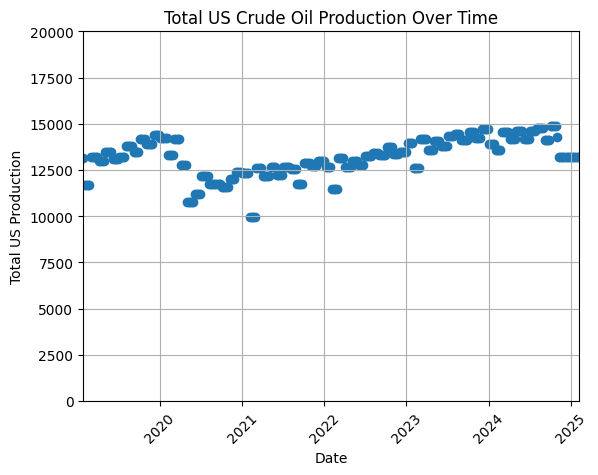

In [ ]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.scatter(merged_df.index, merged_df['US Total Production'])

# Customize the plot
plt.title('Total US Crude Oil Production Over Time')
plt.xlabel('Date')
plt.ylabel('Total US Production')
plt.grid(True)

# Set x-axis limits to start at the first date in the DataFrame
plt.xlim(merged_df.index.min(), end_date)


plt.xticks(rotation=45)

# Set y-axis limits
plt.ylim(0, 20000)

# Show the plot
plt.show()

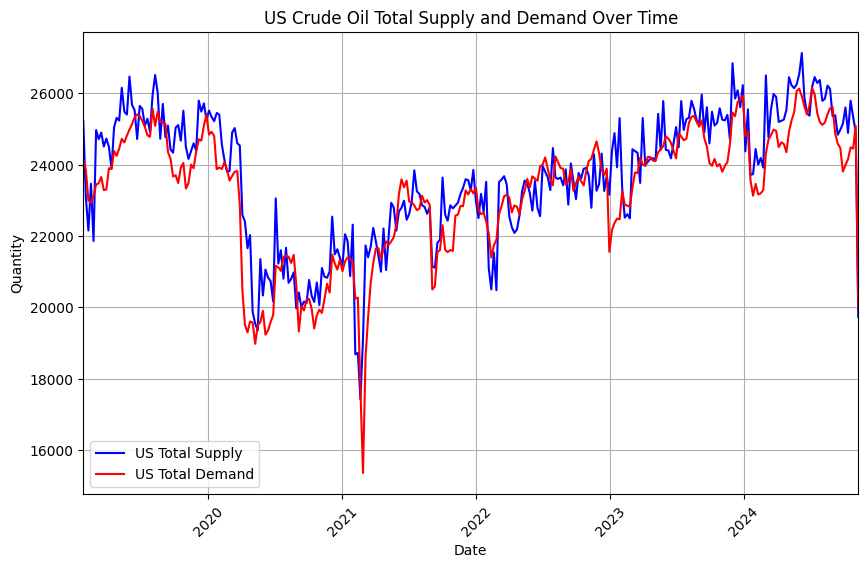

In [ ]:


# Filter data based on end date
end_date = pd.to_datetime('2024-11-08')
filtered_df = merged_df[merged_df.index <= end_date]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_df.index, filtered_df['US Total Supply'], label='US Total Supply', color='blue')  # Blue line for Supply
plt.plot(filtered_df.index, filtered_df['US Total Demand'], label='US Total Demand', color='red')  # Red line for Demand

# Customize the plot
plt.title('US Crude Oil Total Supply and Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()  # Show legend to distinguish Supply and Demand


plt.xlim(filtered_df.index.min(), end_date)

# Show the plot
plt.show()

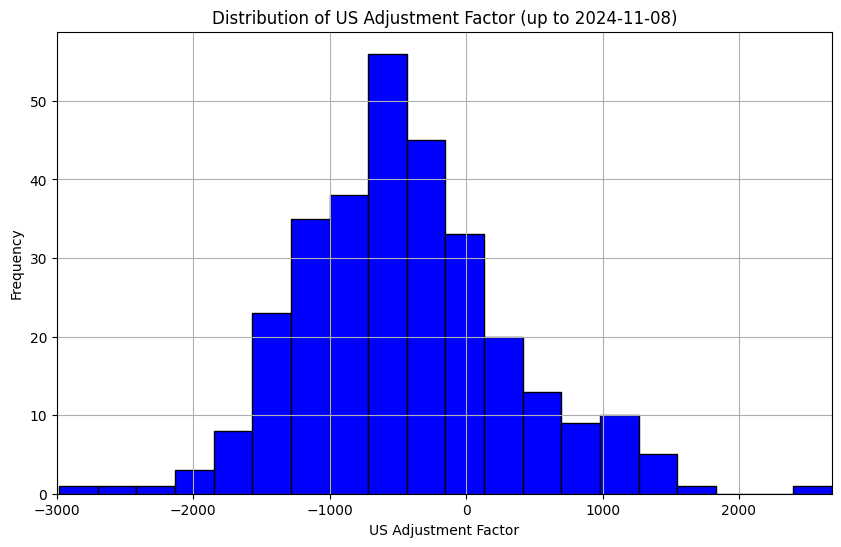

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd



# Filter data based on end date
end_date = pd.to_datetime('2024-11-08')
filtered_df = merged_df[merged_df.index <= end_date]

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['US Adjustment Factor'], bins=20, color='blue', edgecolor='black')

# Customize the plot
plt.title('Distribution of US Adjustment Factor (up to 2024-11-08)')
plt.xlabel('US Adjustment Factor')
plt.ylabel('Frequency')
plt.grid(True)

# Set the x-axis limits
plt.xlim(-3000, filtered_df['US Adjustment Factor'].max())

# Show the plot
plt.show()

In [ ]:
# Regressions and Data Analysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# First Regression - Comparing US Total Change in Inventory to WTI Price
# Conclusion: The r-squared shows that 13.9% of the variation in WTI Price is explained by US Calculated Change of Inventory.
# This is a pretty strong amount of explanation so I will be sure to investigate this relationship more

# Filter data based on end date
end_date = pd.to_datetime('2024-11-08')
filtered_df = merged_df[merged_df.index <= end_date]

# Prepare data for regression
X = filtered_df[['US Reported Change in Inventory']]
y = filtered_df['WTI Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print the model's coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")



Mean Squared Error: 364.3805273116499
R-squared: -0.037163603939672774
Intercept: 69.29559285842339
Coefficient: -0.00035143605639182605


In [ ]:
# Second Regression: Trying to have both WTI and Brent Price explained by US Total Inventory
# R squared of 1.7% for Brent and 1.4% for WTI seems to indicate that just US Total Inventory does not help predict in comparison to the change in Inventory
# This is something that would be expected, but it is good to see it borne out in the data.

# Filter data based on end date
end_date = pd.to_datetime('2024-11-08')
# Convert index to DatetimeIndex
merged_df.index = pd.to_datetime(merged_df.index)
filtered_df = merged_df[merged_df.index <= end_date]

# Prepare data for regression
X = filtered_df[['US Total Inventory']]  # Predictor
y = filtered_df[['Brent Price', 'WTI Price']]  # Targets

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the multi-output linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model for each target
for i, target in enumerate(['Brent Price', 'WTI Price']):
    mse = mean_squared_error(y_test[target], y_pred[:, i])
    r2 = r2_score(y_test[target], y_pred[:, i])
    print(f"Metrics for {target}:")
    print(f"  Mean Squared Error: {mse}")
    print(f"  R-squared: {r2}")

# Print the model's coefficients
print(f"Intercept: {model.intercept_}")  # Intercept for each target
print(f"Coefficients: {model.coef_}")  # Coefficients for each target

Metrics for Brent Price:
  Mean Squared Error: 215.23749790957757
  R-squared: 0.4535963390994774
Metrics for WTI Price:
  Mean Squared Error: 199.68169406328067
  R-squared: 0.43163102873958137
Intercept: [288.47505934 273.1461013 ]
Coefficients: [[-0.00047657]
 [-0.00045267]]


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# --- Data Filtering ---
end_date = pd.to_datetime('2024-11-08')
merged_df.index = pd.to_datetime(merged_df.index)  # Convert index to DatetimeIndex
filtered_df = merged_df[merged_df.index <= end_date]

# --- Predictor Variables ---
predictor_variables = [
    'US Total Inventory',
    'US Total Imports', 'US Total Exports',
    'US Total Production', 'US Total Demand',
    'US Total Supply', 'US Adjustment Factor',
    'US Calculated Change in Inventory', 'US Reported Change in Inventory'
]

# Prepare data for regression
X = filtered_df[predictor_variables]
y_wti = filtered_df['WTI Price']
y_brent = filtered_df['Brent Price']

# --- Data Splitting (outside the loop) ---
X_train, X_test, y_wti_train, y_wti_test, y_brent_train, y_brent_test = train_test_split(
    X, y_wti, y_brent, test_size=0.2, random_state=42
)




# --- R-squared Calculation ---
r_squared_results = {}

for predictor in predictor_variables:
    # Select the predictor column for this iteration
    X_train_predictor = X_train[[predictor]]  # Use X_train here
    X_test_predictor = X_test[[predictor]]    # Use X_test here

    # Train models
    model_wti = LinearRegression().fit(X_train_predictor, y_wti_train)
    model_brent = LinearRegression().fit(X_train_predictor, y_brent_train)

    # Calculate R-squared on the test set
    r2_wti = model_wti.score(X_test_predictor, y_wti_test)
    r2_brent = model_brent.score(X_test_predictor, y_brent_test)

    # Store R-squared values
    r_squared_results[predictor] = {'WTI': r2_wti, 'Brent': r2_brent}

# --- Display Results ---
for predictor, r2_values in r_squared_results.items():
    print(f"Predictor: {predictor}")
    print(f"  R-squared (WTI): {r2_values['WTI']:.4f}")
    print(f"  R-squared (Brent): {r2_values['Brent']:.4f}")
    print("-" * 20)  # Separator

Predictor: US Total Inventory
  R-squared (WTI): 0.4316
  R-squared (Brent): 0.4536
--------------------
Predictor: US Total Imports
  R-squared (WTI): 0.0806
  R-squared (Brent): 0.0994
--------------------
Predictor: US Total Exports
  R-squared (WTI): 0.2490
  R-squared (Brent): 0.2251
--------------------
Predictor: US Total Production
  R-squared (WTI): 0.1469
  R-squared (Brent): 0.1566
--------------------
Predictor: US Total Demand
  R-squared (WTI): 0.2285
  R-squared (Brent): 0.2492
--------------------
Predictor: US Total Supply
  R-squared (WTI): 0.1349
  R-squared (Brent): 0.1565
--------------------
Predictor: US Adjustment Factor
  R-squared (WTI): 0.1040
  R-squared (Brent): 0.1062
--------------------
Predictor: US Calculated Change in Inventory
  R-squared (WTI): 0.1006
  R-squared (Brent): 0.0968
--------------------
Predictor: US Reported Change in Inventory
  R-squared (WTI): -0.0372
  R-squared (Brent): -0.0389
--------------------


In [ ]:
# Fourth Regression: Multivariable Regression
# In this code, I will see how both US Total Demand and US Total Supply do when trying to predict WTI and Brent Price
# Using them together to predict price, they both have about a 52% r-squared value when trying to predict the flat price of Brent and WTI.
# I
# Filter data based on end date
end_date_train = pd.to_datetime('2024-11-08')
merged_df.index = pd.to_datetime(merged_df.index)
filtered_df = merged_df[merged_df.index <= end_date_train]

# Prepare data for regression
X = filtered_df[['US Total Demand', 'US Total Supply']]
y = filtered_df[['Brent Price', 'WTI Price']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the multi-output linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model for each target
for i, target in enumerate(['Brent Price', 'WTI Price']):
    mse = mean_squared_error(y_test[target], y_pred[:, i])
    r2 = r2_score(y_test[target], y_pred[:, i])
    print(f"Metrics for {target}:")
    print(f"  Mean Squared Error: {mse}")
    print(f"  R-squared: {r2}")

# Print the model's coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


Metrics for Brent Price:
  Mean Squared Error: 293.45329015048657
  R-squared: 0.2550370934487888
Metrics for WTI Price:
  Mean Squared Error: 266.2109985054898
  R-squared: 0.24226368336586734
Intercept: [-49.68112537 -38.98520241]
Coefficients: [[ 0.01072131 -0.00529499]
 [ 0.0098411  -0.00507653]]


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# 1. Data Preparation (extract Month feature before splitting)
merged_df['Month'] = merged_df.index.month

# 1. Split data into train and test sets
train_df, test_df = train_test_split(merged_df, test_size=0.2, random_state=42)  # Adjust test_size as needed

# 2. Extract 'Month' from the index
train_df['Month'] = train_df.index.month
test_df['Month'] = test_df.index.month

# 3. Calculate Volatility separately for train and test sets
train_df['Volatility'] = train_df['US Total Supply'].rolling(window=3).std()
train_df.dropna(inplace=True)  # Drop rows with NaNs in 'Volatility'

test_df['Volatility'] = test_df['US Total Supply'].rolling(window=3).std()
test_df.dropna(inplace=True)  # Drop rows with NaNs in 'Volatility'

# 4. Model Training (using Volatility from train_df)
X_train = train_df[['Month']]
y_train = train_df['Volatility']

model = LinearRegression().fit(X_train, y_train)

# 5. Evaluation (using Volatility from test_df)
X_test = test_df[['Month']]
y_test = test_df['Volatility']

y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print the model's coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient (Month): {model.coef_[0]}")


Mean Squared Error: 12014627416.567112
R-squared: -0.046722758407607534
Intercept: 49891.521269391626
Coefficient (Month): 2848.1952622287104


In [ ]:
### In this linear regression I have the US Total Inventory regression past 2024-11-08 till the end of 2025 predict the price of Brent and WTI Price
### This data is fascinating. The price is obviously about 9 dollars or so off for both Brent and WTI, but the spike in price and subsequent decline in Brent is also shown in the prediction dataset.
### Obviously this is not a advanced prediction method, but there seems to be potential utility here.

import pandas as pd
from IPython.display import display

# 1. Prepare prediction data (all data after 2024-11-08)
end_date_train = pd.to_datetime('2024-11-08')
start_date_predict = end_date_train + pd.DateOffset(days=1)
prediction_data = merged_df[merged_df.index >= start_date_predict][['US Total Inventory']]

# 2. Train the model (using data up to 2024-11-08)
train_data = merged_df[merged_df.index <= end_date_train]
X_train = train_data[['US Total Inventory']]
y_train = train_data[['Brent Price', 'WTI Price']]
model = LinearRegression().fit(X_train, y_train)

# 3. Predict prices (if there's prediction data)
if not prediction_data.empty:
    predicted_prices = model.predict(prediction_data)

    # 4. Combine predictions with dates
    predicted_df = pd.DataFrame(predicted_prices, columns=['Predicted Brent Price', 'Predicted WTI Price'], index=prediction_data.index)

    # 5. Display the predictions using display()
    display(predicted_df)
else:
    print("No data available for prediction after 2024-11-08.")




,Predicted Brent Price,Predicted WTI Price
2024-11-15,83.480253,78.398908
2024-11-22,84.341336,79.212764
2024-11-29,86.708496,81.450095
2024-12-06,87.373560,82.078683
2024-12-13,87.809468,82.490683
2024-12-20,89.787391,84.360125
2024-12-27,90.337177,84.879758
2025-01-03,90.784287,85.302345
2025-01-10,91.699974,86.167811
2025-01-17,92.174620,86.616424
